# Regressão Linear em Python

Dependências

In [0]:
%matplotlib inline
import time

from IPython.display import display, clear_output, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', palette='pastel')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def bigprint(*args):
    display(HTML('<h3>' + ' '.join(str(arg) for arg in args) + '</h3>'))

## Dados

Dados sintéticos: relação linear com ruído

> $y = 4+3x + \varphi(x)$

**Número de samples**

$M = 100$

**Número de features (variáveis independentes)**

$n = 1$

x          y
0  0.426418   5.156720
1  1.916373  10.165120
2  1.608440   7.191023
3  0.082613   4.188139
4  1.812826  10.881186

x          y
95  0.904347   7.685941
96  0.295835   4.650250
97  0.966521   9.074809
98  1.644770  10.101438
99  0.068480   4.532857

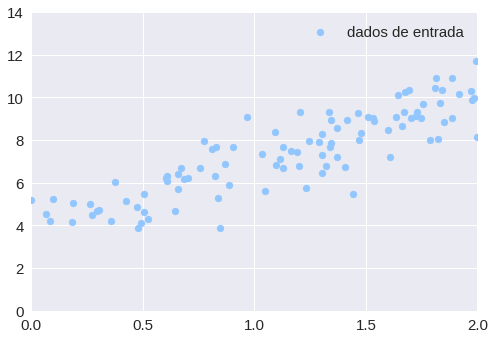

In [3]:
M = 100
n = 1

# geração dos dados sintéticos
X = np.random.uniform(low=0, high=2, size=(M, n))
y = 4 + 3 * X + np.random.randn(M, 1)

data_frame = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
display(data_frame.head())
display(data_frame.tail())

plt.scatter(X, y, label='dados de entrada')

def _adjust_plot():
    plt.legend()
    plt.axis([0, 2, 0, 14])
    plt.locator_params(axis='x', nbins=4)
_adjust_plot()

## Regressão Linear com solução fechada

Equivalente ao Método dos Mínimos Quadrados (MMQ) ou _Ordinary Least Squares (OLS)_.

### Modelo

Predição a partir de um vetor de features $\mathbf{x}$:

$\hat{y} = h(\mathbf{x}; \theta) = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n = \underset{1\times n}{\left[ \begin{array}{cccc} \theta_0 & \theta_1 & \cdots & \theta_n \end{array} \right]} \cdot \underset{n\times 1}{\left[ \begin{array}{c} 1 \\ x_1 \\ \vdots \\ x_n \end{array} \right]} = \theta^T \cdot \mathbf{x}$
<br><br>
Predição a partir de uma matriz $\mathbf{X}$ com todos os exemplos de treinamento:

$\mathbf{\hat{y}} = \begin{bmatrix}
\hat{y}^{(1)} \\ 
\hat{y}^{(2)} \\ 
\vdots \\ 
\hat{y}^{(M)}
\end{bmatrix} =
h_\theta(\mathbf{X}; \theta) =
\begin{bmatrix}
\theta_0 + \theta_1 x_1^{(1)} + \cdots + \theta_n x_n^{(1)} \\
\theta_0 + \theta_1 x_1^{(2)} + \cdots + \theta_n x_n^{(2)} \\
\vdots \\
\theta_0 + \theta_1 x_1^{(M)} + \cdots + \theta_n x_n^{(M)} \\
\end{bmatrix} =
\begin{bmatrix}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\ 
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
1 & x_1^{(M)} & \cdots & x_n^{(M)}
\end{bmatrix} \cdot
\begin{bmatrix}
\theta_0 \\ 
\theta_1 \\ 
\vdots \\ 
\theta_n
\end{bmatrix} =
\mathbf{X} \cdot \theta$


### Função de custo: Erro Médio Quadrado ou _Mean Squared Error (MSE)_
<br>
$J(\theta) = MSE(\theta) = \frac{1}{M} \sum_{i=1}^{M}\left(\hat{y}^{(i)} - y^{(i)}\right)^2 = \frac{1}{M} \sum_{i=1}^{M}\left(\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)}\right)^2$
<br><br>
### Solução fechada: Equação Normal
<br>
$\underset{n\times 1}{\hat{\theta}} = \left( \underset{n\times M}{\mathbf{X}^T} \cdot \underset{M\times n}{\mathbf{X}} \right)^{-1} \cdot \underset{n\times M}{\mathbf{X}^T} \cdot  \underset{M\times 1}{\mathbf{y}} = \bf{X}^+ \cdot \bf{y}$
<br><br>
A equação acima é obtida a partir da minimização da função de custo (derivando e igualando a zero).

A matriz $\mathbf{X}^+$ é conhecida como a pseudo-inversa de  $\mathbf{X}$.

O seu cálculo é mais estável numericamente do que o cálculo da inversa.

### numpy

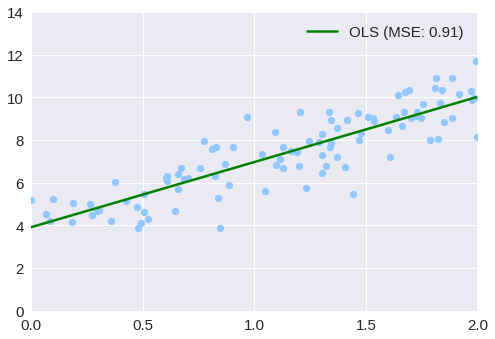

In [4]:
### Adiciona bias
X_ = np.c_[np.ones((M, 1)), X]

### Aplica Equação Normal
# theta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
theta = np.linalg.pinv(X_).dot(y)

bigprint('theta:', theta)

### Calcula métrica MSE
y_hat = X_.dot(theta)
mse = ((y_hat - y) ** 2).mean()

plt.scatter(X, y)
inds = np.argsort(X.ravel())  # ordena os dados para plotar
plt.plot(X[inds], y_hat[inds], 'g-', label='OLS (MSE: {:.2f})'.format(mse))
_adjust_plot()

### scikit-learn (LinearRegression)

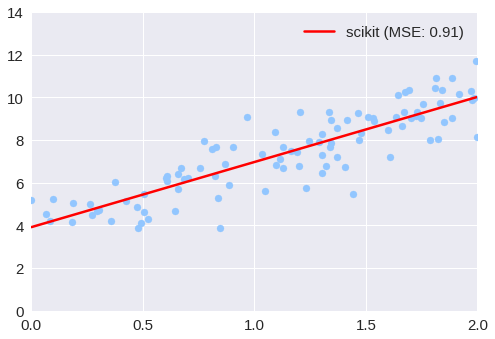

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X, y)

bigprint('theta:', reg.intercept_, reg.coef_)

y_hat = reg.predict(X)
mse = mean_squared_error(y_hat, y)

plt.scatter(X, y)
inds = np.argsort(X.ravel())  # ordena os dados para plotar
plt.plot(X[inds], y_hat[inds], 'r-', label='scikit (MSE: {:.2f})'.format(mse))
_adjust_plot()

## Regressão linear com otimização por Gradiente Descendente

Gradiente Descendente ou _Gradient Descent (GD)_ é um método de otimização iterativo genérico de 1ª ordem, ou seja, só usa a 1ª derivada.

### Atualização de parâmetros por Gradiente Descendente (GD)
<br>
$\theta^{t+1} = \theta^{t} - \eta \cdot \nabla J(\theta^{t})$

onde $t$ é a iteração, $J(\theta)$ é a função de custo e $\nabla J(\theta)$ seu _gradiente_.
<br><br>
### Função de custo da regressão: Erro Médio Quadrado ou _Mean Squared Error (MSE)_
<br>
$J(\theta) = MSE(\theta) = \frac{1}{M} \sum_{i=1}^{M}\left(\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)}\right)^2$
<br><br>
### Derivada parcial da função de custo para $\theta_{j=1 \ldots n}$
<br>
$\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{M} \sum_{i=1}^{M}\left(\theta^T \cdot \mathbf{x}^{(i)} - y^{(i)}\right)x_j^{(i)}$
<br><br>
### Gradiente da função de custo
<br>
$\nabla J(\theta) = \underset{n\times 1}{\nabla_\theta MSE(\theta)} = \frac{2}{M} \underset{n\times M}{\mathbf{X}^T} \left( \underset{M\times n}{\mathbf{X}} \cdot \underset{n\times 1}{\theta} - \underset{M\times 1}{\mathbf{y}} \right)$



### numpy

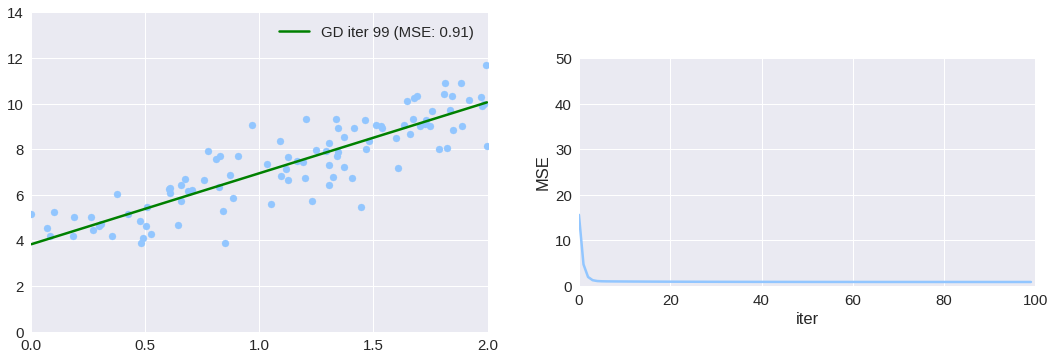

In [7]:
### Hiperparâmetros
lr = 0.1  # learning rate ou tamanho do passo (eta)
max_iter = 100  # máximo de iterações

### Adiciona bias
X_ = np.c_[np.ones((M, 1)), X]

### Inicialização dos parâmetros
# theta = np.random.randn(n + 1, 1)
theta = np.zeros((n + 1, 1))

losses = []

for i in range(max_iter):
    #### Cálculo do gradiente (d(MSE)/d(theta))
    grad = 2 / M * X_.T.dot(X_.dot(theta) - y)

    ### Atualização dos parâmetros
    theta = theta - lr * grad

    ### Monitoramento da função de custo (loss)
    y_hat = X_.dot(theta)
    mse = ((y_hat - y) ** 2).mean()
    losses.append(mse)

    if (i + 1) % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(18, 16));

        ### Plot da estimativa atual
        ax1 = plt.subplot(121, aspect=0.1)
        ax1.scatter(X, y)
        inds = np.argsort(X.ravel())  # ordena os dados para plotar
        ax1.plot(X[inds], y_hat[inds], 'g-', label='GD iter {} (MSE: {:.2f})'.format(i, mse))
        _adjust_plot()

        ### Plot da loss
        ax2 = plt.subplot(122, aspect=1)
        ax2.axis([0, max_iter, 0, 50])
        ax2.set_xlabel('iter')
        ax2.set_ylabel('MSE')
        ax2.plot(np.arange(i + 1), losses)

#         plt.gcf().set_size_inches(18, 16)
        plt.show();
        display(plt.gcf())
        time.sleep(1.0)

bigprint('theta:', theta)

### scikit-learn (SGDRegressor)

Otimização por Gradiente Descendente Estocástico, ou **_Stochastic Gradient Descent (SGD)_**.

* Variação do GD:  **apenas uma amostra** aleatória dos dados de treinamento é usada em uma iteração
* Possibilita processar conjuntos de dados maiores que a memória RAM disponível
* Função de custo fica mais ruidosa: ajuda a escapar de mínimos locais, mas pode prejudicar convergência ótima
    * É comum diminuir o learning rate após algumas iterações
* **_Mini-batch Gradient Descent_**:  outra variação na qual um **subconjunto** aleatório dos dados de treinamento é usado em uma iteração

In [0]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.1)
reg.fit(X, y.ravel())  # nota: ravel() é similar ao flatten(), mas sem cópia

bigprint('theta:', reg.intercept_, reg.coef_)

y_hat = reg.predict(X)
mse = mean_squared_error(y_hat, y)

plt.scatter(X, y)
inds = np.argsort(X.ravel())  # ordena os dados para plotar
plt.plot(X[inds], y_hat[inds], 'r-', label='scikit SGD (MSE: {:.2f})'.format(mse))
_adjust_plot()

## Regressão polinomial

É possível modelar relações não lineares adicionando potências de uma feature como novas features.

### Dados

Dados sintéticos: relação quadrática com ruído

> $y = x^2/2 + x + 2 + \varphi(x)$

**Número de samples**

$M = 100$

**Número de features (variáveis independentes)**

$n = 2$

* $x_1$
* $x_2 = x_1^2$



x         y
0  0.572996  3.559234
1 -1.278804  0.818743
2 -2.581811  3.362501
3  0.416796  4.398989
4 -1.569988  0.333977

x         y
95  1.514558  3.419509
96 -2.865065  2.565925
97  1.066243  2.245624
98 -0.026559  2.064658
99 -1.145765  1.464394

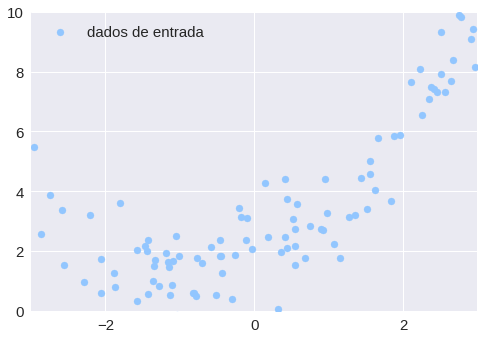

In [8]:
M = 100
n_real = 1

# geração dos dados sintéticos
X = np.random.uniform(low=-3, high=3, size=(M, n_real))
y = 0.5 * X ** 2 + X + 2 + np.random.randn(M, 1)

data_frame = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
display(data_frame.head())
display(data_frame.tail())

plt.scatter(X, y, label='dados de entrada')
def _adjust_plot():
    plt.legend()
    plt.axis([-3, 3, 0, 10])
    plt.locator_params(axis='x', nbins=4)
_adjust_plot()

### numpy

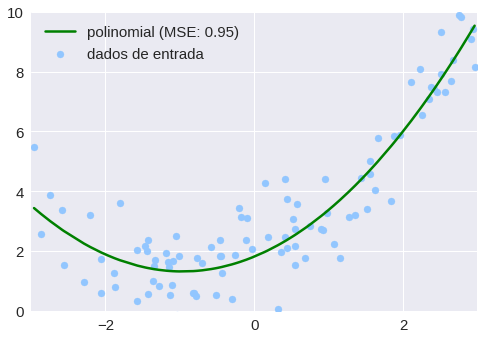

In [9]:
### Adiciona bias e feature quadrática
X_ = np.c_[np.ones((M, 1)), X, X ** 2]
n = 2

theta = np.linalg.pinv(X_).dot(y)

y_hat = X_.dot(theta)
mse = ((y_hat - y) ** 2).mean()

plt.scatter(X, y, label='dados de entrada')
inds = np.argsort(X.ravel())  # ordena os dados para plotar
plt.plot(X[inds], y_hat[inds], 'g-', label='polinomial (MSE: {:.2f})'.format(mse))
_adjust_plot()

bigprint('theta:', theta)

### scikit-learn (PolynomialFeatures + LinearRegression())



In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

transformer = PolynomialFeatures(degree=2, include_bias=False)
# obs: se houvesse duas features a e b, PolynomialFeatures com degree=3
# geraria as combinações: a², a³, b², b³, ab, a²b e ab², portanto tomar
# cuidado com explosão combinatória
X_t = transformer.fit_transform(X)
reg = LinearRegression()
reg.fit(X_t, y)

bigprint('theta:', reg.intercept_, reg.coef_)

y_hat = reg.predict(X_t)
mse = mean_squared_error(y_hat, y)

plt.scatter(X, y, label='dados de entrada')
inds = np.argsort(X.ravel())  # ordena os dados para plotar
plt.plot(X[inds], y_hat[inds], 'r-', label='polinomial scikit (MSE: {:.2f})'.format(mse))
_adjust_plot()

## Regressão linear com regularização

### Regularização L2 ou _Ridge Regression_

#### Função de custo
<br>
$J(\theta) = MSE(\theta) + \lambda\frac{1}{2} \sum_{i=1}^{n}\theta_i^2$
<br>
#### Gradiente da função de custo
<br>
$\nabla_\theta J(\theta) = \nabla_\theta MSE(\theta) + \lambda \mathbf{w}$

onde $\mathbf{w} = \left[ \begin{array}{cccc} 0 & \theta_1 & \cdots & \theta_n \end{array} \right]$
<br>
### Outras opções

* Regularização L1 ou _Lasso Regression_
* _Elastic Net_: pondera entre L1 e L2

### Dados

Dados sintéticos: relação quadrática com ruído

> $y = x^2/2 + x + 2 + \varphi(x)$

**Número de samples**

$M = 20$

**Número de features (variáveis independentes)**

$n = 5$

* $x_1$
* $x_2 = x_1^2$
* $x_3 = x_1^3$
* etc.

x         y
0  0.292881  3.829850
1  1.291136  3.919494
2  0.616580  3.119734
3  0.269299  1.451464
4 -0.458071 -0.906146

x         y
15 -2.477224  2.969258
16 -2.878690  2.376952
17  1.995719  4.006370
18  1.668941  4.713710
19  2.220073  6.840784

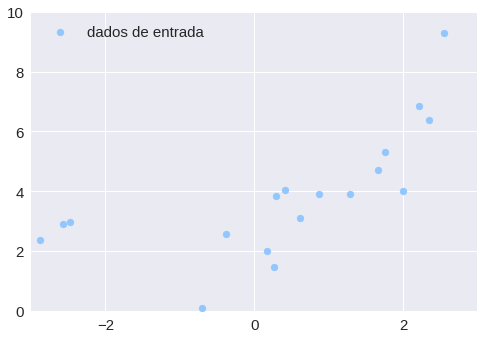

In [10]:
np.random.seed(0)
M = 20
n_real = 1

# geração dos dados sintéticos
X = np.random.uniform(low=-3, high=3, size=(M, n_real))
y = 0.5 * X ** 2 + X + 2 + np.random.randn(M, n_real)

data_frame = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])
display(data_frame.head())
display(data_frame.tail())

plt.scatter(X, y, label='dados de entrada')
def _adjust_plot():
    plt.legend()
    plt.axis([-3, 3, 0, 10])
    plt.locator_params(axis='x', nbins=4)
_adjust_plot()

### scikit-learn (Ridge)

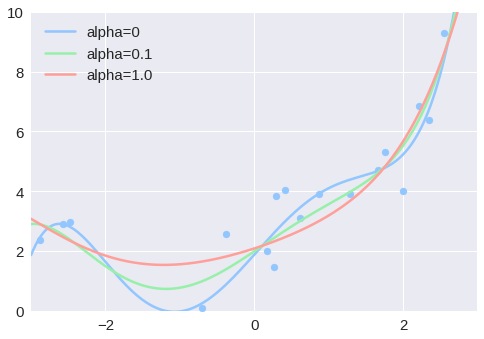

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

plt.scatter(X, y)
Xnew = np.linspace(-3, 3, num=200).reshape(-1, 1)

for alpha in [0, 0.1, 1.0]:
    reg = Ridge(alpha=alpha)

    model = make_pipeline(
        PolynomialFeatures(degree=5, include_bias=False),
        StandardScaler(),
        reg
    )

    model.fit(X, y.ravel())

    bigprint('alpha:', alpha, '| theta:', reg.coef_, reg.intercept_)

    ynew_hat = model.predict(Xnew)

    plt.plot(Xnew, ynew_hat, '-', label='alpha={}'.format(alpha))

_adjust_plot()